In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.listdir('/home/ak/.config/matplotlib')
plt.style.use('/home/ak/.config/matplotlib/latexstyle.mplstyle')
folder = '/home/ak/Documents/Research/PaperCode/Thesis Plots'

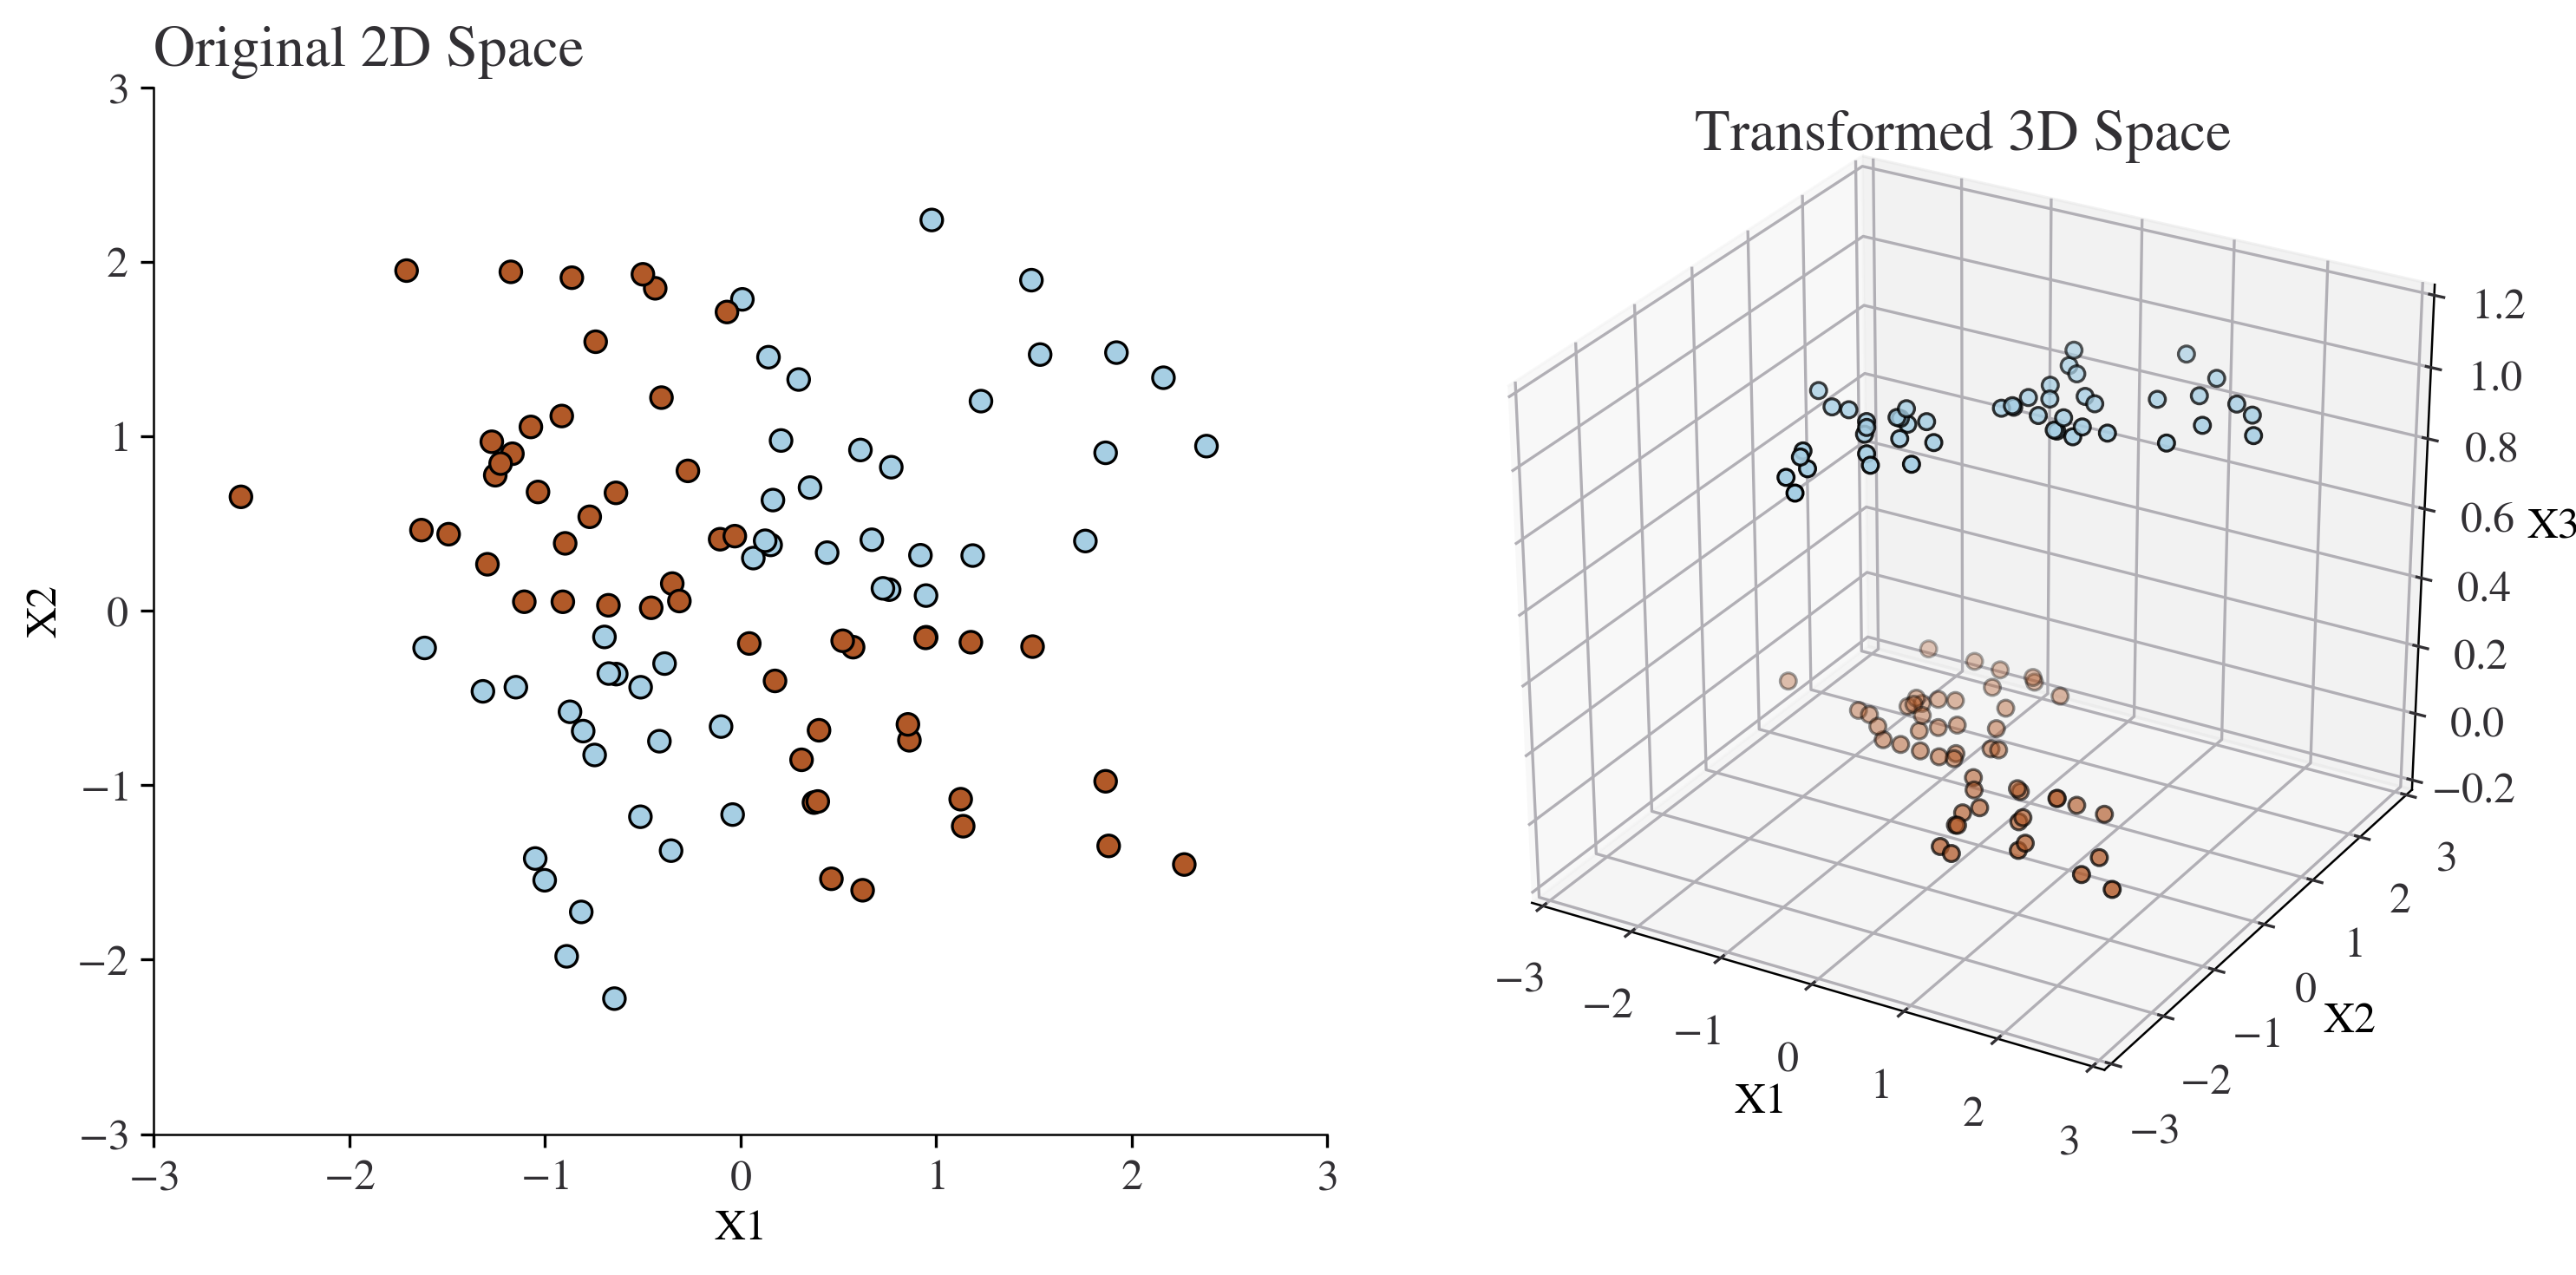

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

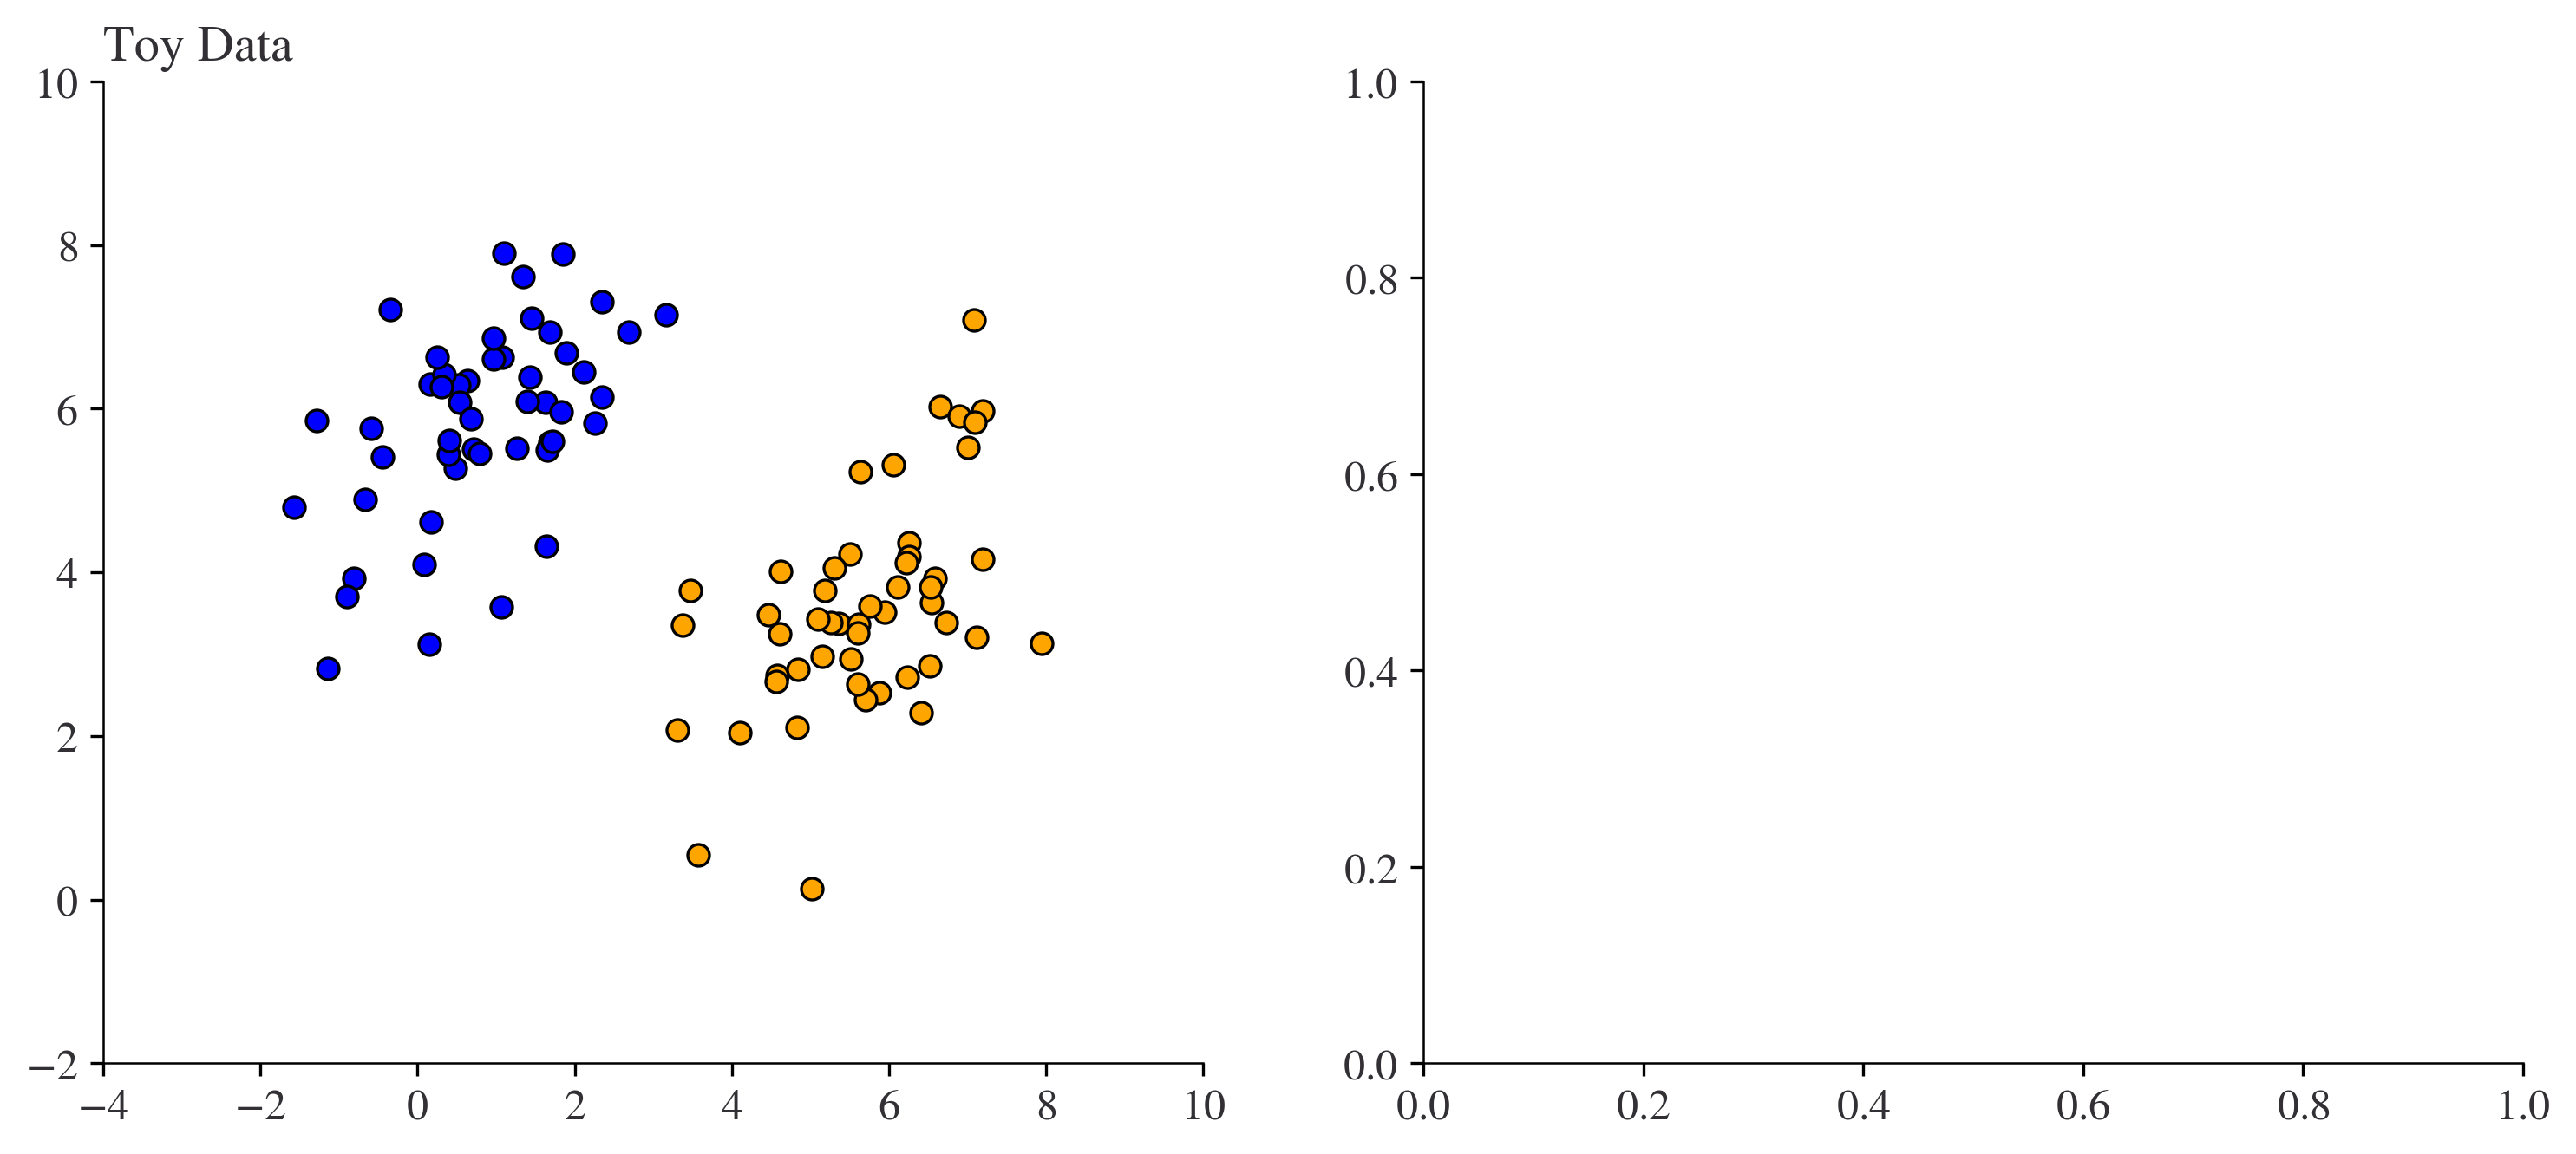

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(1)
x1 = np.random.multivariate_normal([1, 6], [[2, 1], [1, 1.5]], size=50) 
x2 = np.random.multivariate_normal([6, 4], [[1.5, 1], [1, 2]], size=50)
X = np.vstack([x1, x2])
y = np.hstack([np.zeros(50), np.ones(50)])

# Train GMM 
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Get Fisher scores
fisher_scores = gmm.score_samples(X) 

# Normalize Fisher scores  
fisher_scores = (fisher_scores - fisher_scores.min(axis=0)) / (fisher_scores.max(axis=0) - fisher_scores.min(axis=0))

# Plot 
f, axarr = plt.subplots(1, 2, figsize=(12, 5))

axarr[0].scatter(x1[:,0], x1[:,1], c='blue')
axarr[0].scatter(x2[:,0], x2[:,1], c='orange')
axarr[0].set_title('Toy Data', fontsize=14)

im = axarr[1].scatter(fisher_scores[:,0], fisher_scores[:,1], c=y, cmap='coolwarm')
axarr[1].set_title('Fisher Scores', fontsize=14)
f.colorbar(im)

plt.tight_layout()
plt.show()

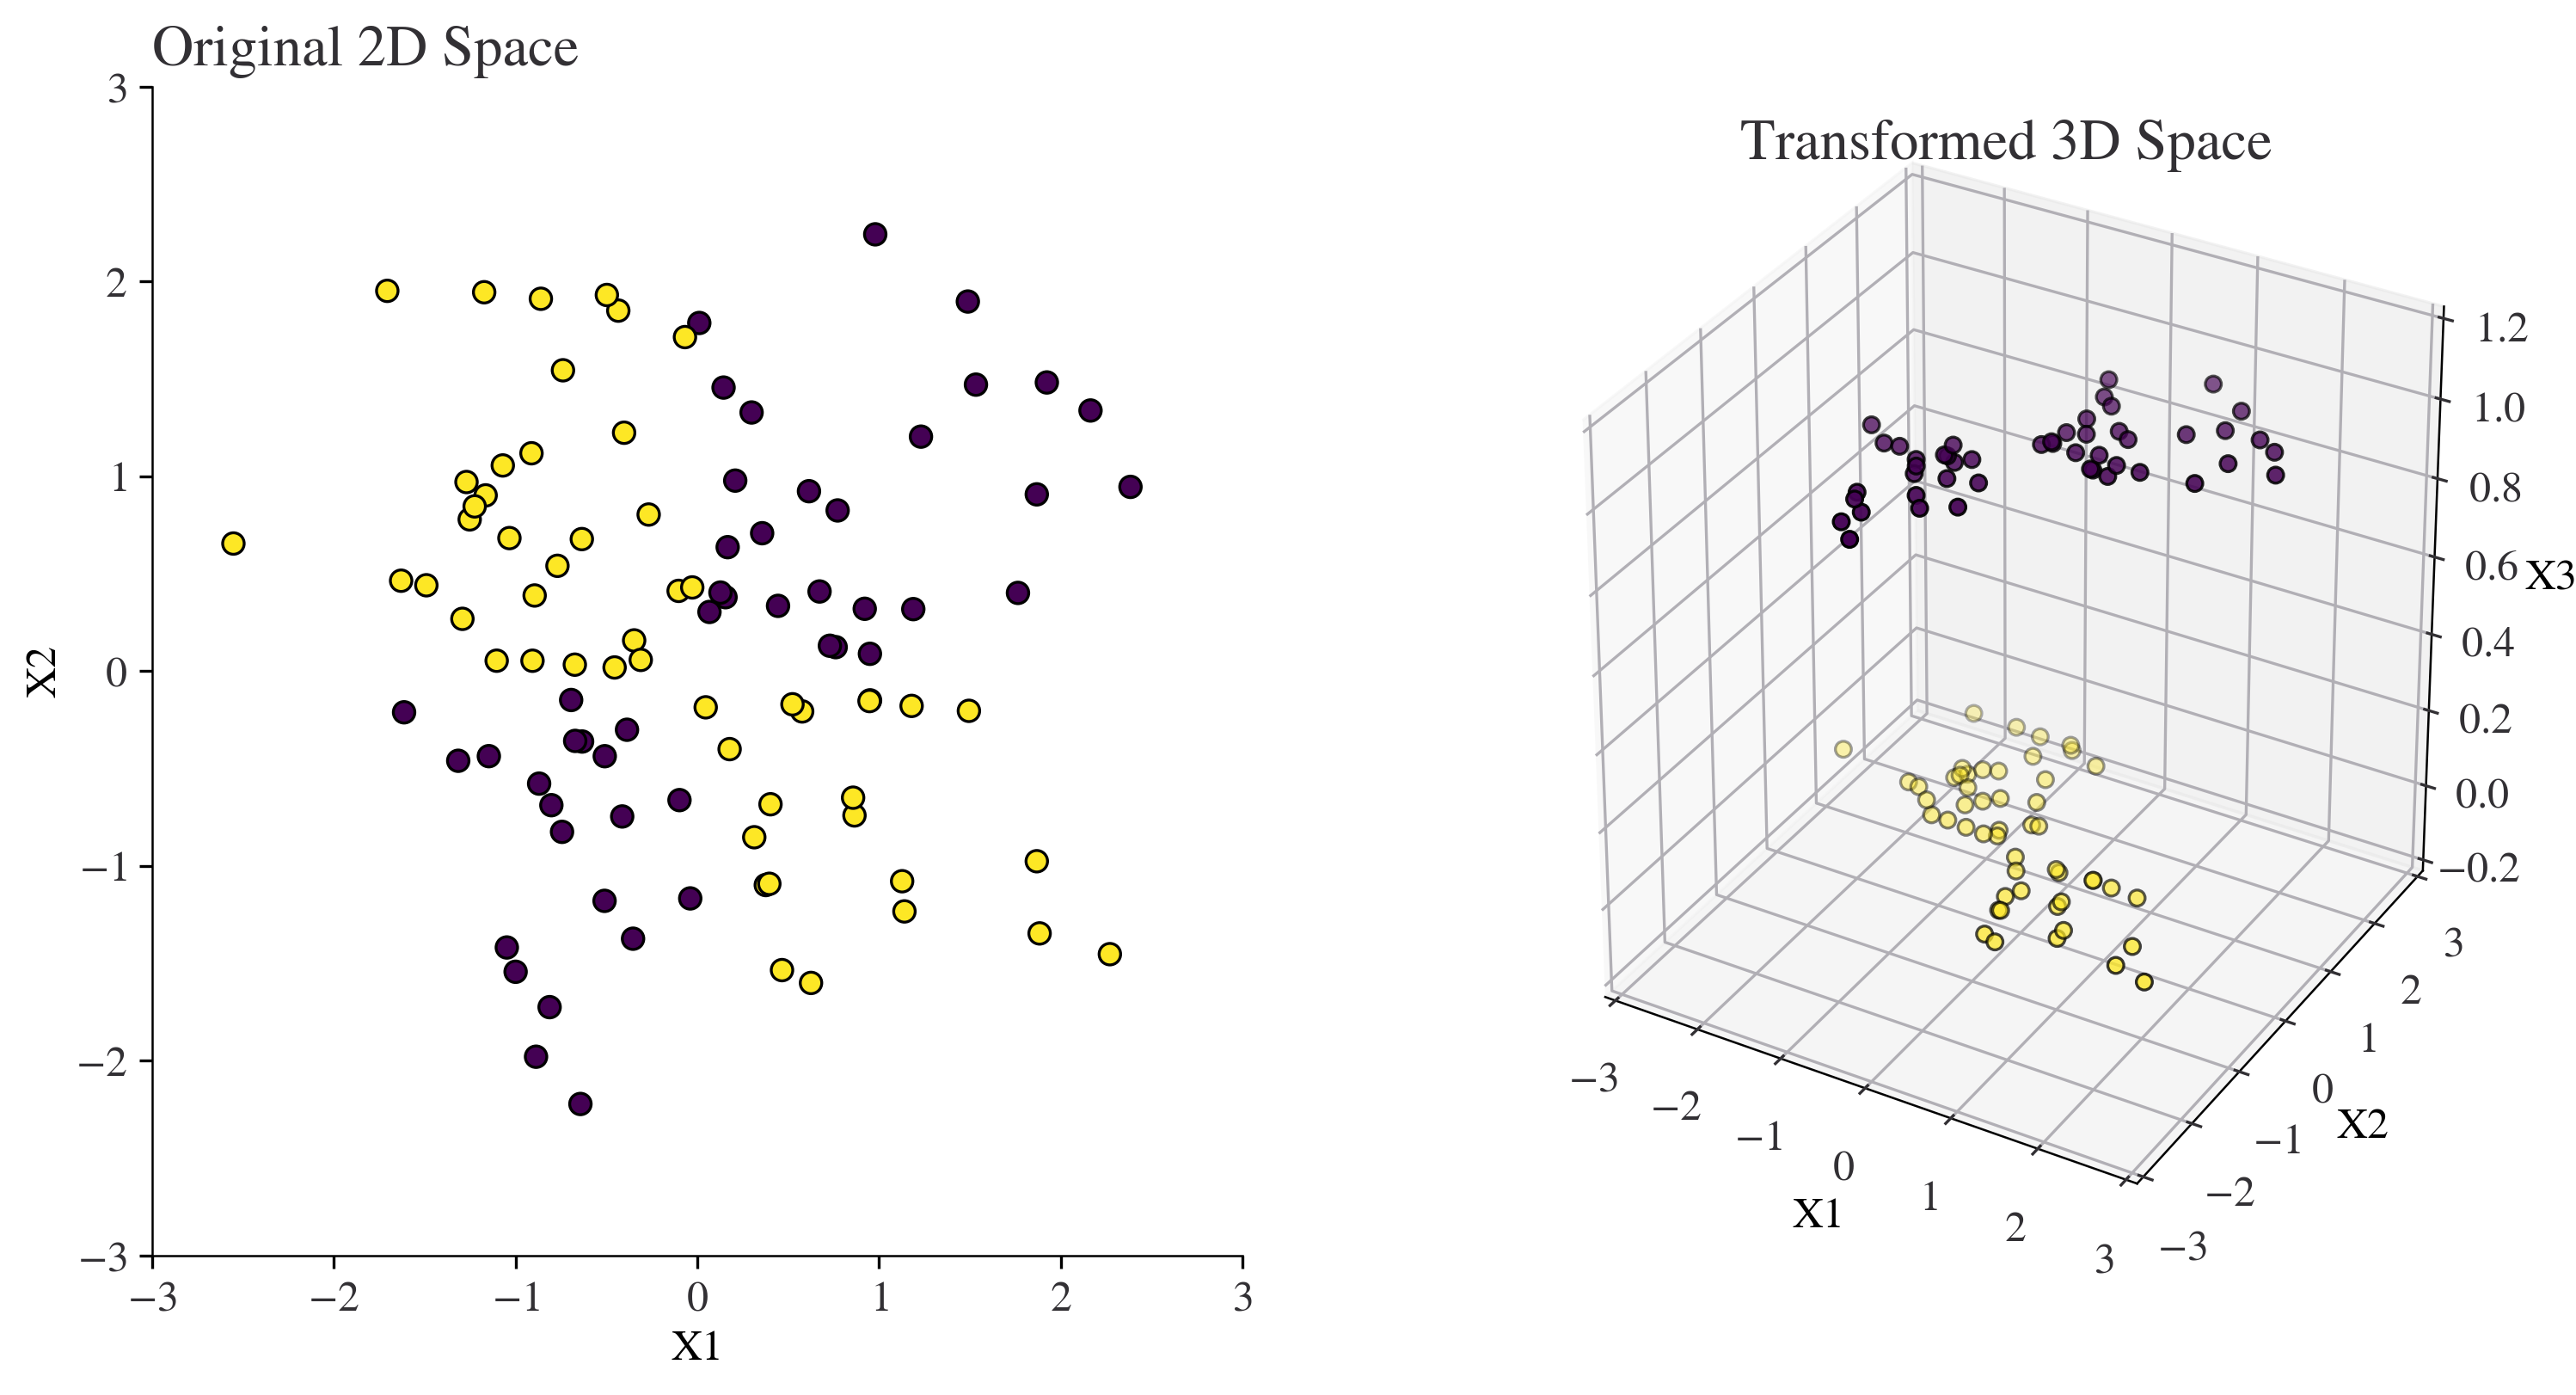

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic XOR data
np.random.seed(0)
N = 100
x = np.random.randn(N, 2)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

# Transform data to 3D
z = np.logical_not(y)
x = np.hstack((x, z.reshape(N, 1)))

# Plot data in 2D
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original 2D Space')

# Plot data in 3D
ax = plt.subplot(122, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Transformed 3D Space')

plt.show()

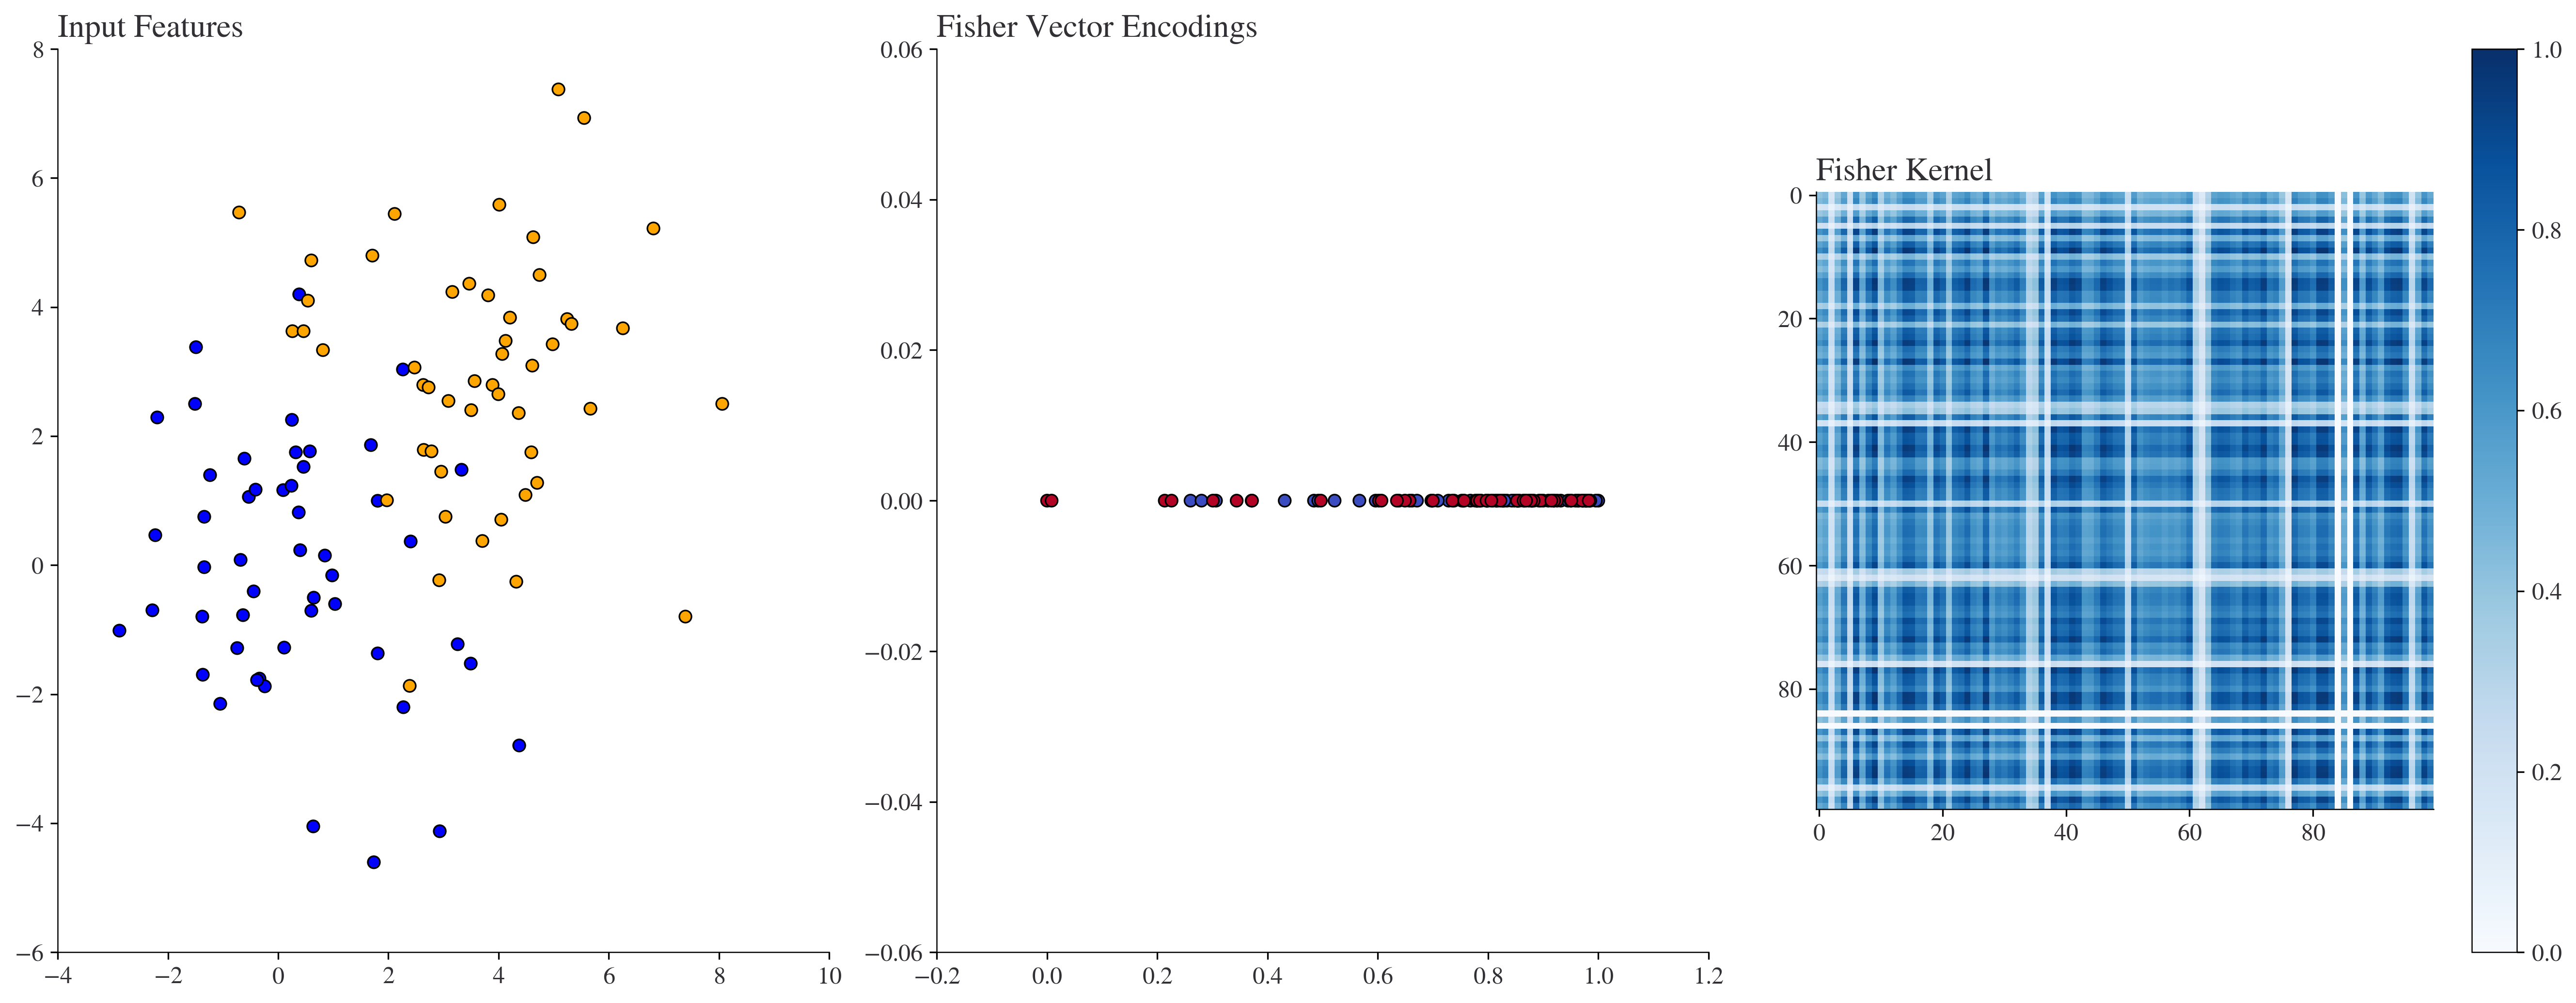

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Generate synthetic input features
np.random.seed(1)
x1 = np.random.normal(loc=0, scale=2, size=(50, 2))
x2 = np.random.normal(loc=3, scale=2, size=(50, 2))
X = np.vstack([x1, x2])

# Train GMM 
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

# Get Fisher vector encodings
fv = gmm.score_samples(X)

# Normalize Fisher vectors
fv = (fv - fv.min(axis=0)) / (fv.max(axis=0) - fv.min(axis=0))
fv = np.column_stack([fv, np.zeros_like(fv)])

# Define y for coloring the scatter plot
y = np.array([0]*50 + [1]*50)

# Plot
fig, axarr = plt.subplots(1, 3, figsize=(18, 7))

# Input features
axarr[0].scatter(x1[:, 0], x1[:, 1], c='blue')  
axarr[0].scatter(x2[:, 0], x2[:, 1], c='orange')
axarr[0].set_title('Input Features')

# GMM model  
axarr[1].scatter(fv[:, 0], fv[:, 1], c=y, cmap='coolwarm')
axarr[1].set_title('Fisher Vector Encodings')

# Fisher kernel
im = axarr[2].imshow(np.dot(fv, fv.T), cmap='Blues')
axarr[2].set_title('Fisher Kernel')
fig.colorbar(im)
title = 'howMKLworks.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)  
plt.tight_layout()
plt.show()


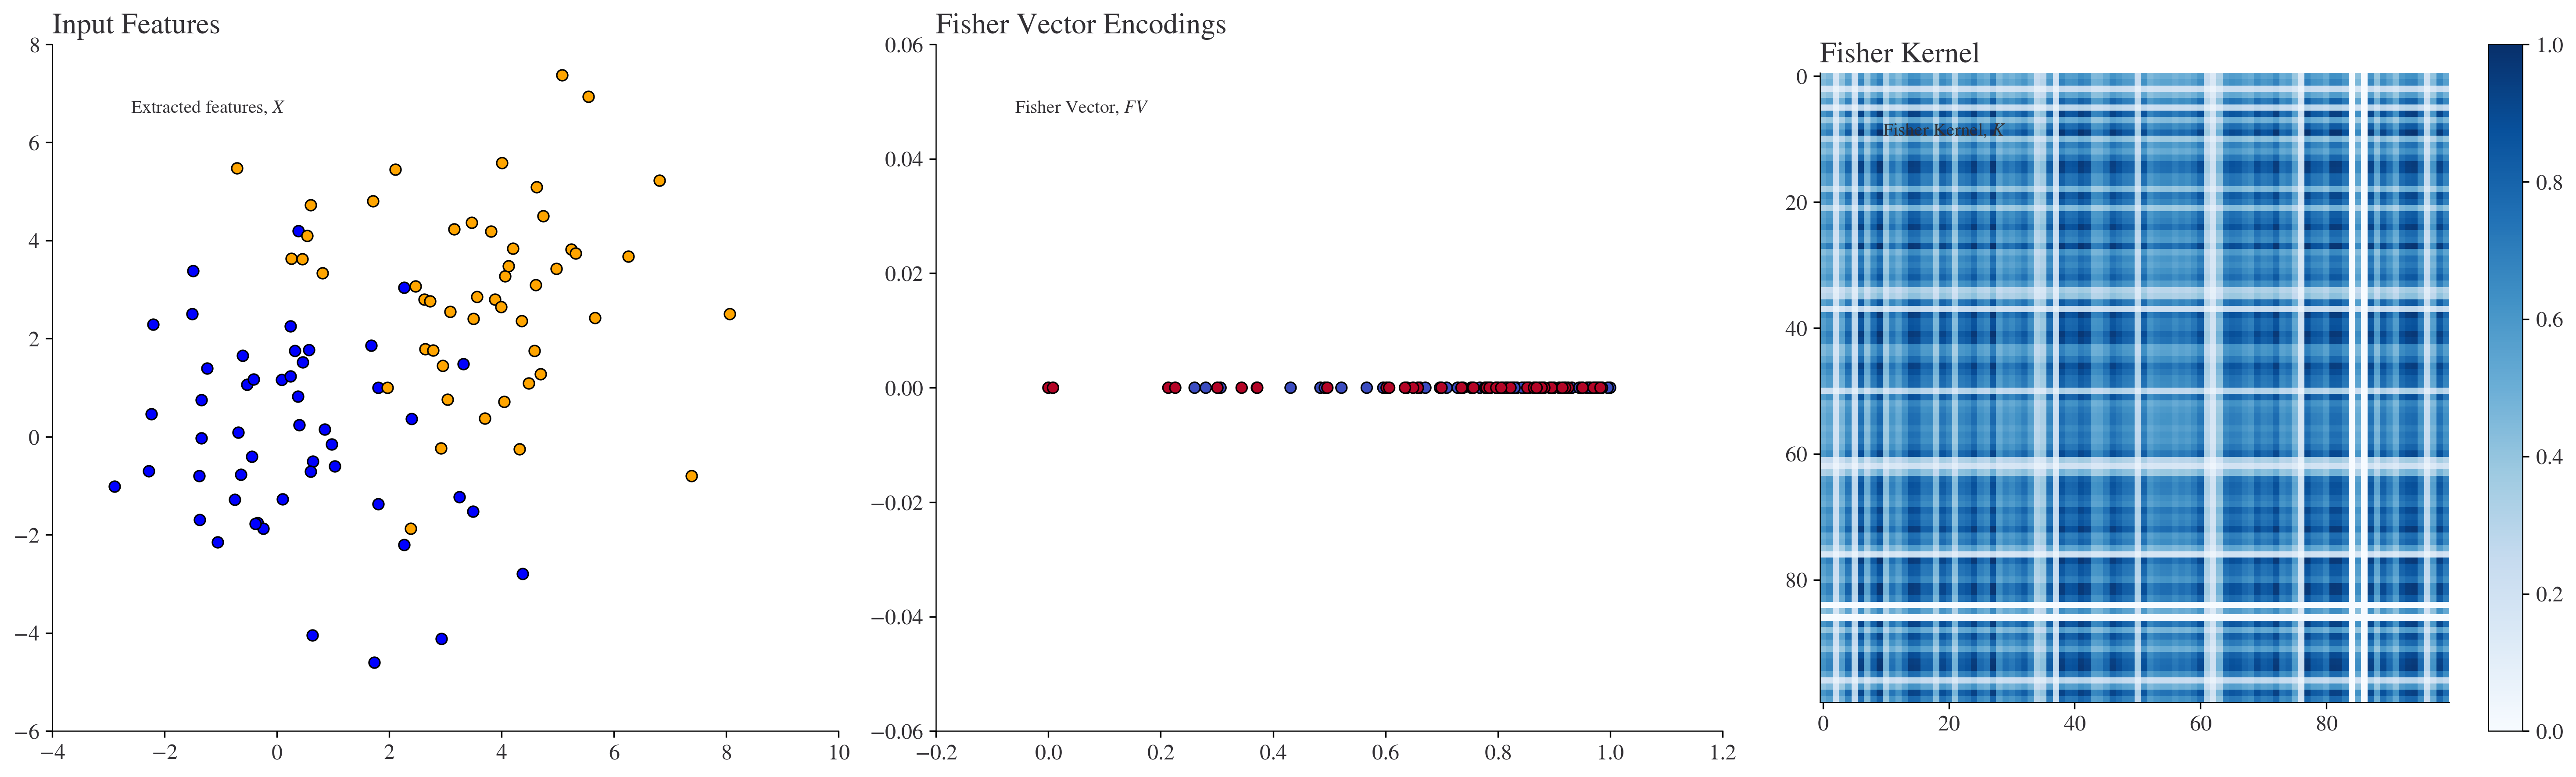

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

# Generate synthetic input features
np.random.seed(1)
x1 = np.random.normal(loc=0, scale=2, size=(50, 2))
x2 = np.random.normal(loc=3, scale=2, size=(50, 2))
X = np.vstack([x1, x2])

# Train GMM 
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

# Get Fisher vector encodings
fv = gmm.score_samples(X)

# Normalize Fisher vectors
fv = (fv - fv.min(axis=0)) / (fv.max(axis=0) - fv.min(axis=0))
fv = np.column_stack([fv, np.zeros_like(fv)])

# Define y for coloring the scatter plot
y = np.array([0]*50 + [1]*50)

# Train an SVM classifier using the Fisher vectors
clf = SVC(kernel='linear')
clf.fit(fv, y)

# Plot
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))

# Input features
axarr[0].scatter(x1[:, 0], x1[:, 1], c='blue')  
axarr[0].scatter(x2[:, 0], x2[:, 1], c='orange')
axarr[0].set_title('Input Features')
axarr[0].annotate(r'Extracted features, $X$', xy=(0.1, 0.9), xycoords='axes fraction')

# GMM model  
axarr[1].scatter(fv[:, 0], fv[:, 1], c=y, cmap='coolwarm')
axarr[1].set_title('Fisher Vector Encodings')
axarr[1].annotate(r'Fisher Vector, $FV$', xy=(0.1, 0.9), xycoords='axes fraction')

# Fisher kernel
im = axarr[2].imshow(np.dot(fv, fv.T), cmap='Blues')
axarr[2].set_title('Fisher Kernel')
axarr[2].annotate(r'Fisher Kernel, $K$', xy=(0.1, 0.9), xycoords='axes fraction')
fig.colorbar(im, ax=axarr[2])

plt.tight_layout()
plt.show()


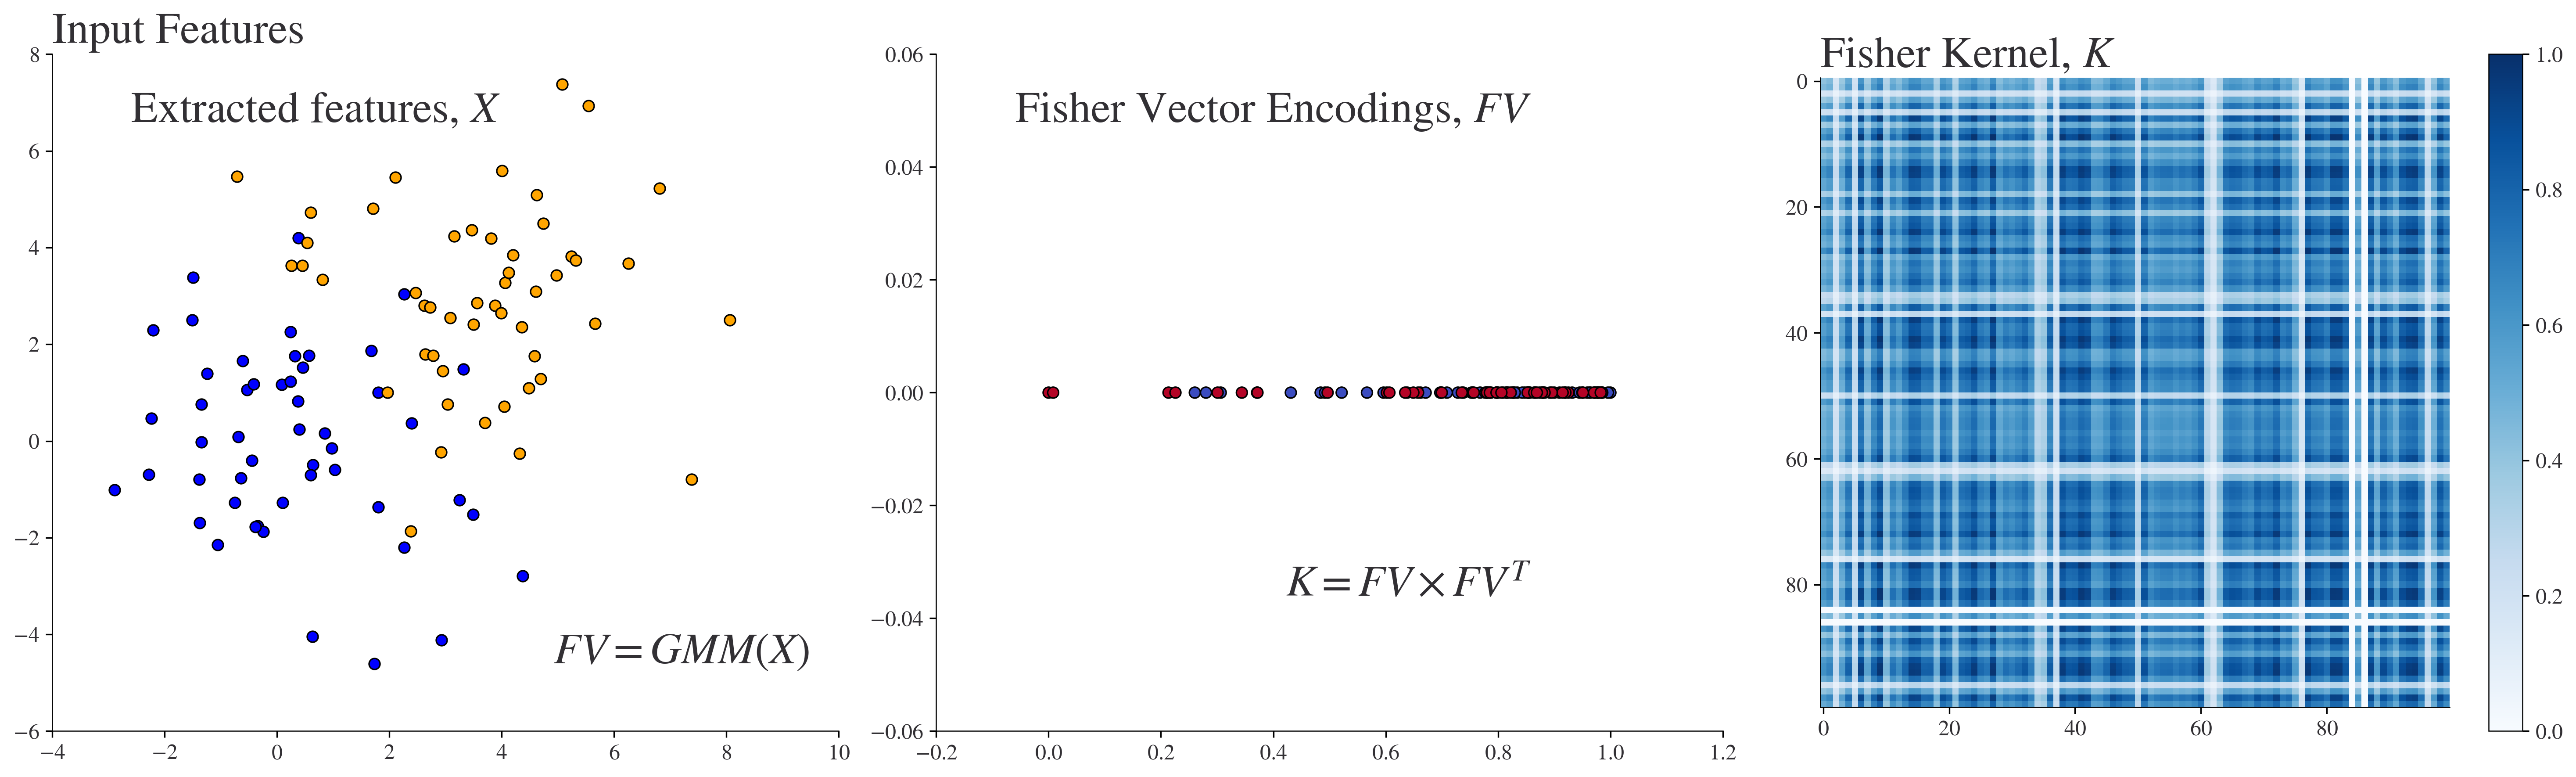

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from matplotlib.patches import FancyArrowPatch

# Generate synthetic input features
np.random.seed(1)
x1 = np.random.normal(loc=0, scale=2, size=(50, 2))
x2 = np.random.normal(loc=3, scale=2, size=(50, 2))
X = np.vstack([x1, x2])

# Train GMM 
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

# Get Fisher vector encodings
fv = gmm.score_samples(X)

# Normalize Fisher vectors
fv = (fv - fv.min(axis=0)) / (fv.max(axis=0) - fv.min(axis=0))
fv = np.column_stack([fv, np.zeros_like(fv)])

# Define y for coloring the scatter plot
y = np.array([0]*50 + [1]*50)

# Plot
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))

# Input features
axarr[0].scatter(x1[:, 0], x1[:, 1], c='blue')  
axarr[0].scatter(x2[:, 0], x2[:, 1], c='orange')
axarr[0].set_title('Input Features', fontsize=24)
axarr[0].annotate(r'Extracted features, $X$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=24)

# GMM model  
axarr[1].scatter(fv[:, 0], fv[:, 1], c=y, cmap='coolwarm')
# axarr[1].set_title('Fisher Vector Encodings', fontsize=24)
axarr[1].annotate(r'Fisher Vector Encodings, $FV$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=24)

# Fisher kernel
im = axarr[2].imshow(np.dot(fv, fv.T), cmap='Blues')
axarr[2].set_title('Fisher Kernel, $K$', fontsize =24)
# axarr[2].annotate(r'Fisher Kernel, $K$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=24, color='darkblue')
fig.colorbar(im, ax=axarr[2])

# # Adding curved arrows with explanations
# arrow1 = FancyArrowPatch(posA=(0.8, 0.5), posB=(0.2, 0.5), connectionstyle="arc3,rad=.3", arrowstyle="->", mutation_scale=15, color="black", ax=axarr[0])
# arrow2 = FancyArrowPatch(posA=(0.8, 0.5), posB=(0.2, 0.5), connectionstyle="arc3,rad=.3", arrowstyle="->", mutation_scale=15, color="black", ax=axarr[1])
# axarr[0].add_patch(arrow1)
# axarr[1].add_patch(arrow2)

# Adding curved arrows with explanations
arrow1 = FancyArrowPatch(posA=(0.0, 0.5), posB=(0.2, 0.5), connectionstyle="arc3,rad=.3", arrowstyle="<-", mutation_scale=15, color="black")
arrow2 = FancyArrowPatch(posA=(0.8, 0.5), posB=(0.2, 0.5), connectionstyle="arc3,rad=.3", arrowstyle="<-", mutation_scale=15, color="black")
# axarr[0].add_patch(arrow1)
# axarr[1].add_patch(arrow2)

# Adding transformation equations
transform1 = r"$FV = GMM(X)$"
transform2 = r"$K = FV \times FV^T$"

axarr[0].annotate(transform1, xy=(0.8, 0.1), xycoords='axes fraction', fontsize=24, ha="center")
axarr[1].annotate(transform2, xy=(0.6, 0.2), xycoords='axes fraction', fontsize=24, ha="center")
title = 'Fisher.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)  
plt.tight_layout()
plt.show()


/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


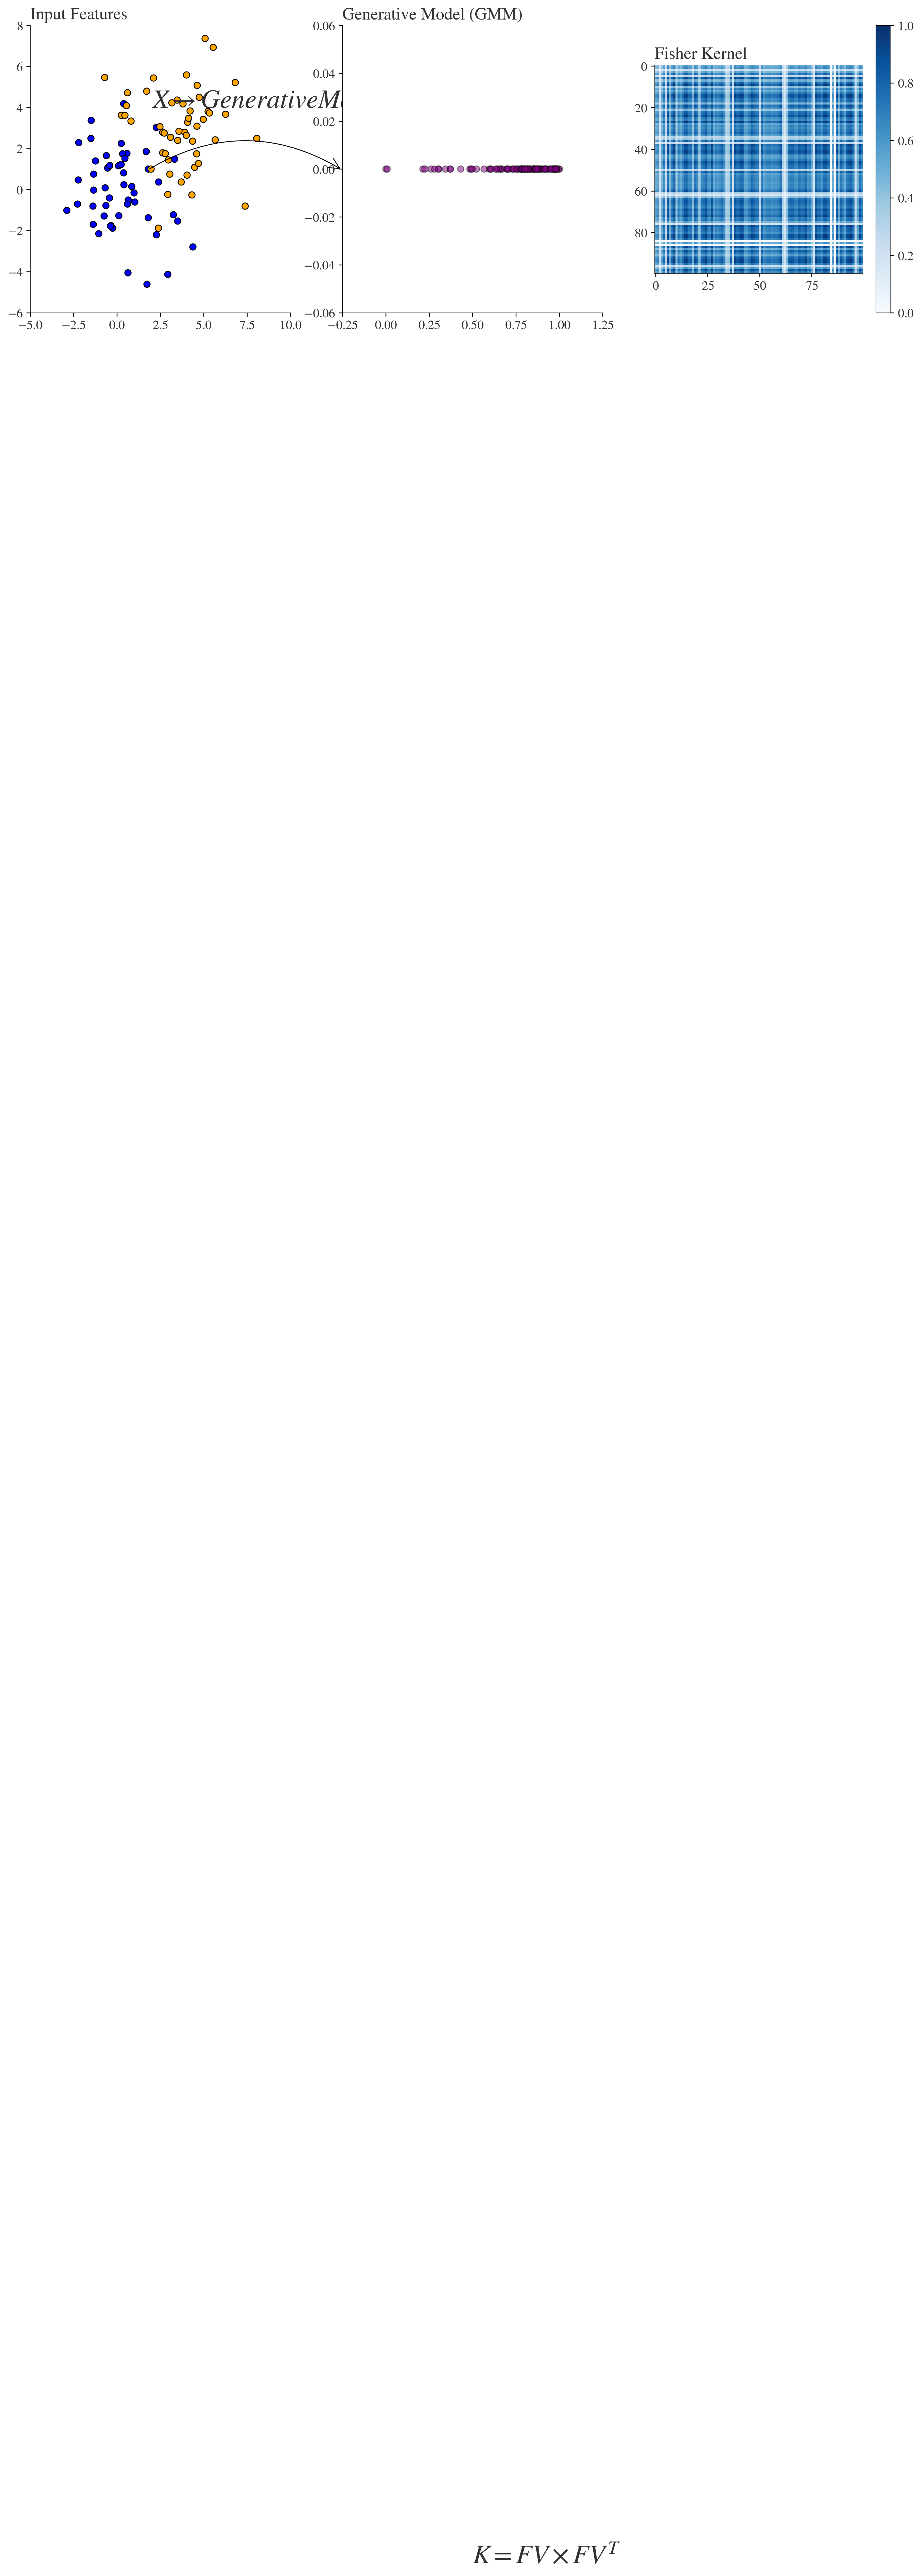

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from sklearn.mixture import GaussianMixture

# Generate synthetic input features
np.random.seed(1)
x1 = np.random.normal(loc=0, scale=2, size=(50, 2))
x2 = np.random.normal(loc=3, scale=2, size=(50, 2))
X = np.vstack([x1, x2])

# Train GMM
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

# Get Fisher vector encodings
fv = gmm.score_samples(X)

# Normalize Fisher vectors
fv_normalized = (fv - fv.min(axis=0)) / (fv.max(axis=0) - fv.min(axis=0)) 
fv_normalized = np.column_stack([fv_normalized, np.zeros_like(fv_normalized)])

# Plot
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

# Input features
axarr[0].scatter(x1[:,0], x1[:,1], c='blue')
axarr[0].scatter(x2[:,0], x2[:,1], c='orange')
axarr[0].set_title('Input Features')

# GMM model as a generative model representation
axarr[1].scatter(fv_normalized[:, 0], fv_normalized[:, 1], c='purple', alpha=0.5)
axarr[1].set_title('Generative Model (GMM)')

# Fisher Kernel
im = axarr[2].imshow(np.dot(fv_normalized, fv_normalized.T), cmap='Blues')
axarr[2].set_title('Fisher Kernel')
fig.colorbar(im, ax=axarr[2])

# Adding a long curved arrow from plot 1 to the plot with the Fisher vector
arrow_style = "->"
long_arrow = FancyArrowPatch(posA=(axarr[0].get_position().bounds[2], 0.5),
                             posB=(axarr[1].get_position().bounds[0], 0.5),
                             connectionstyle="arc3,rad=-.3",
                             arrowstyle=arrow_style,
                             mutation_scale=25,
                             color="black",
                             transform=fig.transFigure, # This makes the arrow coordinate system to be in figure fraction
                             clip_on=False) # This ensures the arrow is not clipped and spans between axes
fig.patches.append(long_arrow)

# Adding transformation equations
font_properties = {'size': 25, 'weight': 'bold'}
axarr[0].text(2, 4, r"$X \rightarrow Generative Model (GMM)$", **font_properties)
# axarr[1].text(0.5, 0.5, r"$FV = GMM(X)$", **font_properties)
axarr[1].text(0.5, -1, r"$K = FV \times FV^T$", **font_properties)

plt.tight_layout()
plt.show()
